# Difference Maps

This IPython notebook shows some plots of timeseries of experimentally measured difference maps.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Ampicillin only (no inhibitor)

In [2]:
data = pd.read_csv('./data/difference_maps_ampicillin_no_inhibitor.csv')

In [3]:
## set colors

amp_values = list(set(data.ampicillin))
amp_values.sort()

color_dict = zip(amp_values, cm.gist_earth(linspace(0.1, 0.9, len(amp_values))))
color_dict = dict(color_dict)

## Plot difference maps

3 replicates are available for each condition

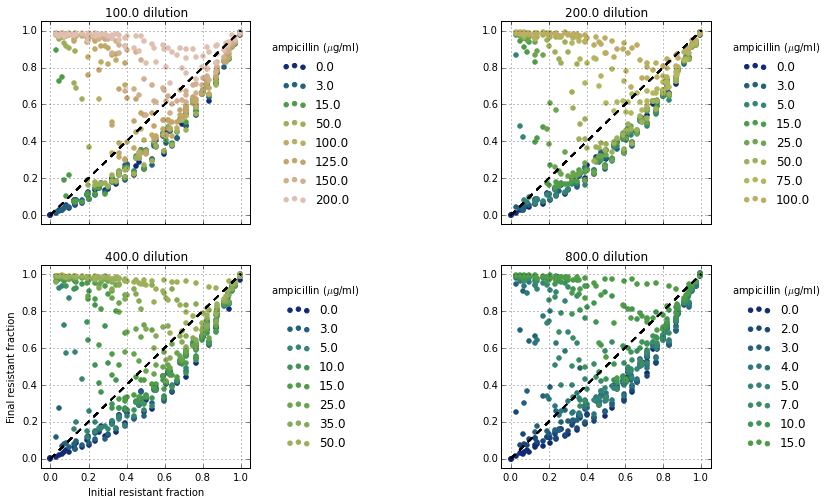

In [4]:
fig, axes = subplots(nrows=2, ncols=2, figsize=(12, 8))
subplots_adjust(wspace=1.2)

for index, (l, g) in enumerate(data.groupby(by=['dilution'])):
    ax = axes.ravel()[index]
    sca(ax)
    title('{} dilution '.format(l))
    for l2, g2 in g.groupby(by=['ampicillin', 'replicate']):
        amp = l2[0]
        rep = l2[1]
        
        if rep == 0:
            label = amp
        else:
            label = None
            
        g2.plot(x='fi', y='ff', ax=ax, kind='scatter', color=color_dict[l2[0]], label=label)
        
        xx = linspace(0, 1, 10)
        plot(xx, xx, '--k', linewidth=1.5)
        
        if index != 2:
            xlabel('')
            ylabel('')
        else:
            xlabel('Initial resistant fraction')
            ylabel('Final resistant fraction')
        
    xlim(-0.05, 1.05)
    ylim(-0.05, 1.05)
    legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False, title='ampicillin ($\mu$g/ml)')

# With tazobactam

In [5]:
data = pd.read_csv('./data/difference_maps_ampicillin_with_tazobactam.csv')

In [6]:
taz_values = list(set(data.tazobactam))
taz_values.sort()

color_dict = zip(taz_values, cm.gist_earth(linspace(0.1, 0.9, len(taz_values))))
color_dict = dict(color_dict)

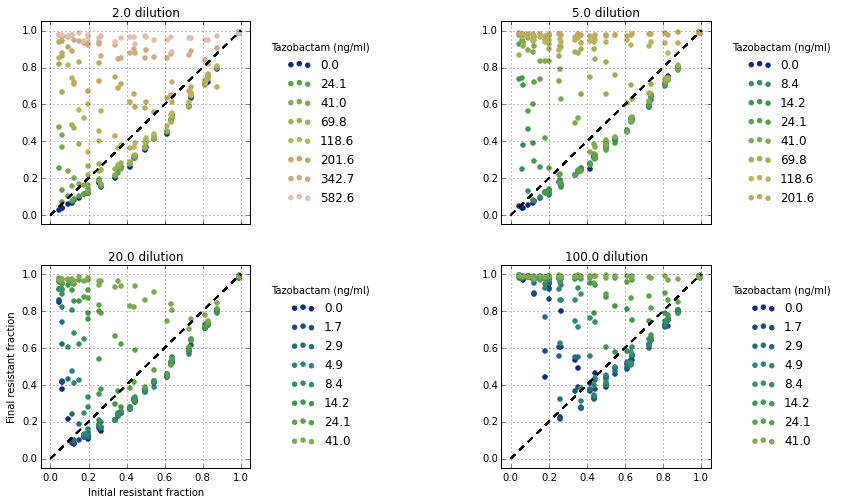

In [7]:
fig, axes = subplots(nrows=2, ncols=2, figsize=(12, 8))
subplots_adjust(wspace=1.2)

for index, (l, g) in enumerate(data.groupby(by=['ampicillin'])):
    ax = axes.ravel()[index]
    sca(ax)
    title('{} dilution '.format(l))
    for l2, g2 in g.groupby(by=['tazobactam', 'replicate']):
        tz = l2[0]
        rep = l2[1]
        
        if rep == 0:
            label = tz
        else:
            label = None
            
        g2.plot(x='fi', y='ff', ax=ax, kind='scatter', color=color_dict[l2[0]], label=label)
        
        xx = linspace(0, 1, 10)
        plot(xx, xx, '--k', linewidth=1.5)
        
        if index != 2:
            xlabel('')
            ylabel('')
        else:
            xlabel('Initial resistant fraction')
            ylabel('Final resistant fraction')
        
    xlim(-0.05, 1.05)
    ylim(-0.05, 1.05)
    legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False, title='Tazobactam (ng/ml)')